## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>3 |</span></span></b> Explore</b></p></div>

- **Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling or hypothesis testing task.**

In [1]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #plotting statistical graphs
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import squarify
from collections import Counter

# Load the Text Cleaning Package
import neattext.functions as nfx

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm ##new progress bars repeatedly
import os
import nltk ##building Python programs to work with human language data
#import spacy #for training the NER model tokenize words
#import random
#from spacy.util import compounding
#from spacy.util import minibatch


pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'D:\Natural Language Processing\Phase 4 Project\data\intermediate_data.csv')

df.sample()

,id,date,username,tweet,clean_tweet,userhandle,hashtags,urls,preprocessed_tweet,lemma_preprocessed_tweet,stemma_preprocessed_tweet,Subjectivity,Polarity,sentiment
10405,1230553255597527041,2020-02-20,migunamiguna,"@DCI_Kenya @FredMatiangi @WilliamsRuto TRANSLATION: There is a cover-up happening and it's not by the one Despot Uhuru Kenyatta and his Conman @RailaOdinga have declared ""Public Enemy Number One."" I don't like Ruto and would like to see him fail with all the other cabals. But I hate injustice even against crooks.",translation coverup happening despot uhuru kenyatta conman declared public enemy number like ruto like fail cabals hate injustice crooks,"['@dci_kenya', '@fredmatiangi', '@williamsruto', '@railaodinga']",[],[],translation coverup happening despot uhuru kenyatta conman declared public enemy number like ruto like fail cabals hate injustice crooks,translation coverup happening despot uhuru kenyatta conman declared public enemy number like ruto like fail cabal hate injustice crook,translat coverup happen despot uhuru kenyatta conman declar public enemi number like ruto like fail cabal hate injustic crook,0.422222,-0.433333,Negative


In [3]:
df.isna().sum()

id                             0
date                           0
username                       0
tweet                          0
clean_tweet                  323
userhandle                     0
hashtags                       0
urls                           0
preprocessed_tweet           327
lemma_preprocessed_tweet     327
stemma_preprocessed_tweet    327
Subjectivity                   0
Polarity                       0
sentiment                      0
dtype: int64

## <b>3.1 <span style='color:#F1A424'>|</span> Most Common Words</b>

In [4]:
df.columns

Index(['id', 'date', 'username', 'tweet', 'clean_tweet', 'userhandle',
       'hashtags', 'urls', 'preprocessed_tweet', 'lemma_preprocessed_tweet',
       'stemma_preprocessed_tweet', 'Subjectivity', 'Polarity', 'sentiment'],
      dtype='object')

In [5]:
df['tweet_temp'] = df['preprocessed_tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['tweet_temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,uhuru,4957
1,kenyatta,4932
2,despot,3838
3,kenyans,3715
4,kenya,3056
5,conman,2596
6,like,2435
7,public,1600
8,raila,1390
9,power,1339


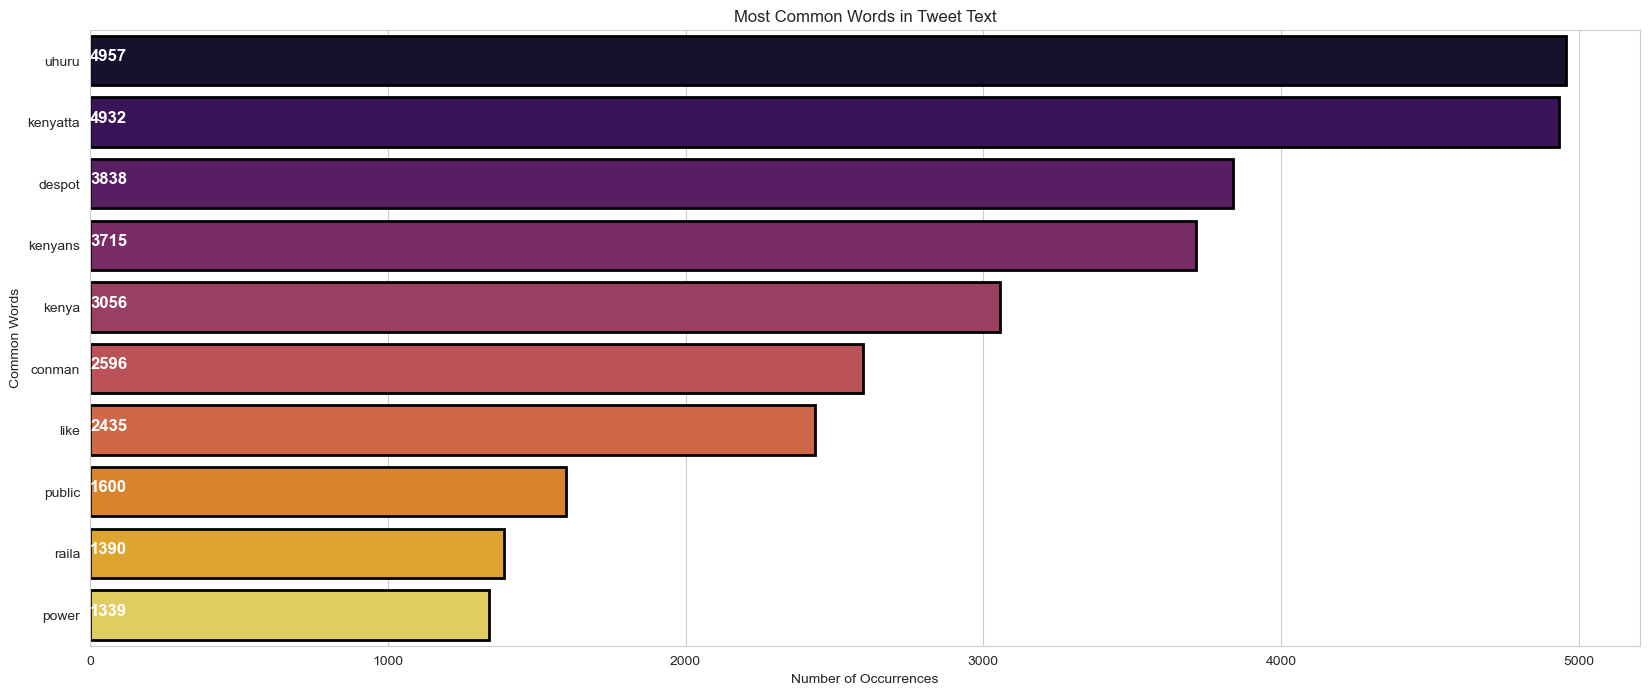

In [6]:
# plot top 20 most frequent words using seaborn.
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="count",y="Common_words", data=temp, palette="inferno", linewidth=2,edgecolor='black')
plt.title("Most Common Words in Tweet Text")
plt.xlabel("Number of Occurrences")
plt.ylabel("Common Words")

# Addd annotaions for the barplots.
for i,j in enumerate(temp["count"]):
    ax.text(.7,i,j,weight="bold",color="white",fontsize=12)

plt.show()

## <b>3.2 <span style='color:#F1A424'>|</span> Character Count by Tweet</b>

In [7]:
def _get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)

count    21692.000000
mean       205.641896
std         94.269698
min          6.000000
25%        114.750000
50%        261.000000
75%        278.000000
max        509.000000
Name: tweet_len, dtype: float64

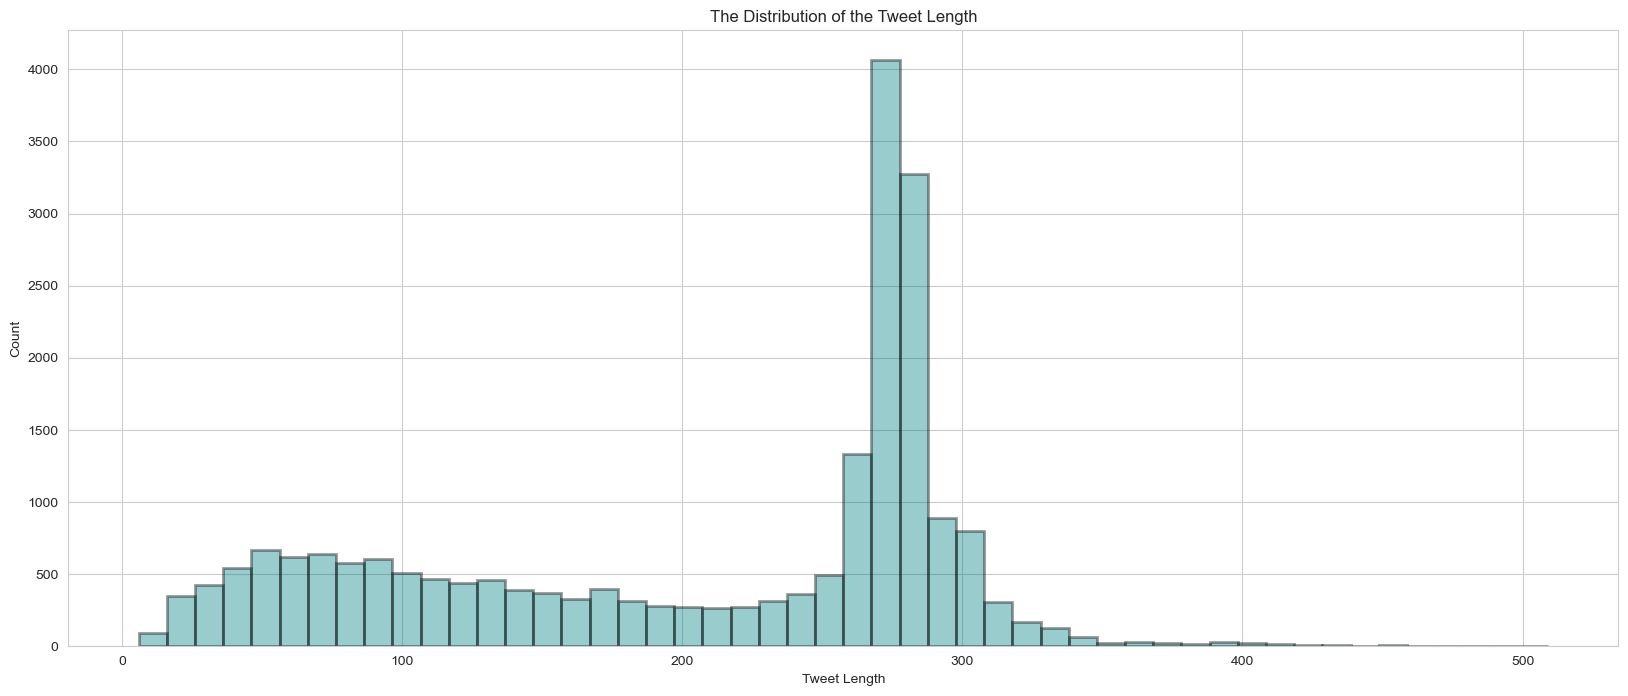

In [8]:
# get the character length for each tweet
df['tweet_len'] = df['tweet'].apply(lambda x:len(x))

display(df['tweet_len'].describe())

# plot the distribution of the tweet length
plt.figure(figsize=(20,8))
sns.distplot(df['tweet_len'], color='teal',kde=False, hist_kws=dict(edgecolor="black", linewidth=2), bins=50)
plt.title('The Distribution of the Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Count')

plt.show()

- **`Tweet Length Distribution:` The image shows the frequency of different tweet lengths in a sample of tweets. The most common tweet length is around 250 - 280 characters, which is close to the maximum limit of 280 characters. This suggests that the user (Dr. Miguna Miguna) tries to utilize the available space as much as possible when tweeting.**

## <b>3.3 <span style='color:#F1A424'>|</span> Word Count by Tweet</b>

,preprocessed_tweet,word_counts
4885,read onesmus kipchumba,3
12747,excellent recap despot deludes kenyans foolish cowardly like conman slave raila odinga,12
1127,exactly,1
9617,dr ouma oluga kenyas leading physicians heading ministry health task force waste expertise taken county hall subordinate clueless military general,20
12098,legal documents zombie kenyan national id card birth certificate drivers license passport documents grants citizens entry,16


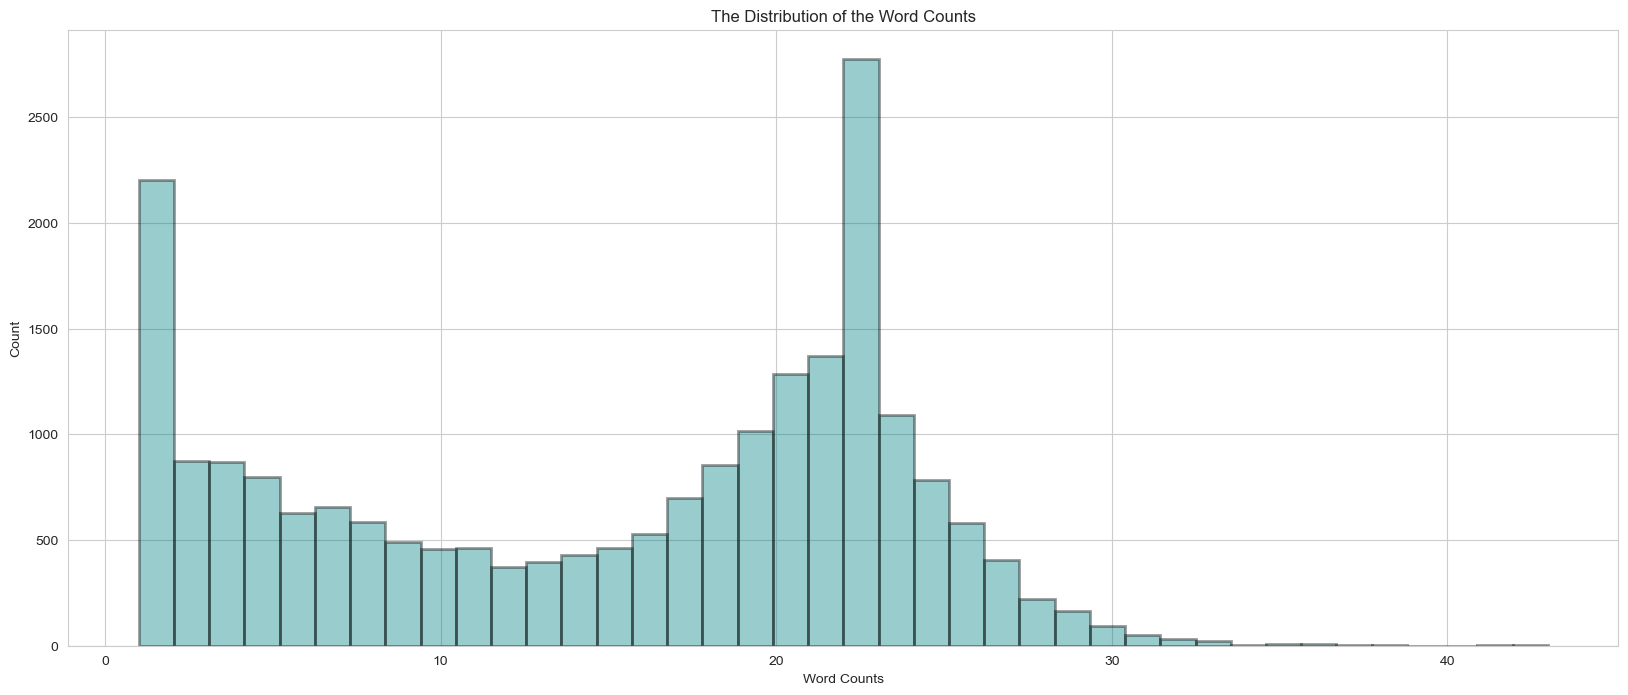

In [9]:
def _get_wordcounts(x):
	length = len(str(x).split())
	return length

df['word_counts'] = df['preprocessed_tweet'].apply(lambda x:_get_wordcounts(x))

display(df[['preprocessed_tweet','word_counts']].sample(5))

df['word_counts'].describe()

# plot word_counts
plt.figure(figsize=(20,8))
sns.distplot(df['word_counts'], color='teal', kde=False, hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('The Distribution of the Word Counts')
plt.xlabel('Word Counts')
plt.ylabel('Count')


plt.show()

**The histogram shows that the most common word count is between 20 and 25. The distribution is skewed to the right, meaning that there are more tweets with lower word counts than higher word counts. The lowest word count is between 1 and 5.**

## <b>3.4 <span style='color:#F1A424'>|</span> Character Count by Sentiment</b>

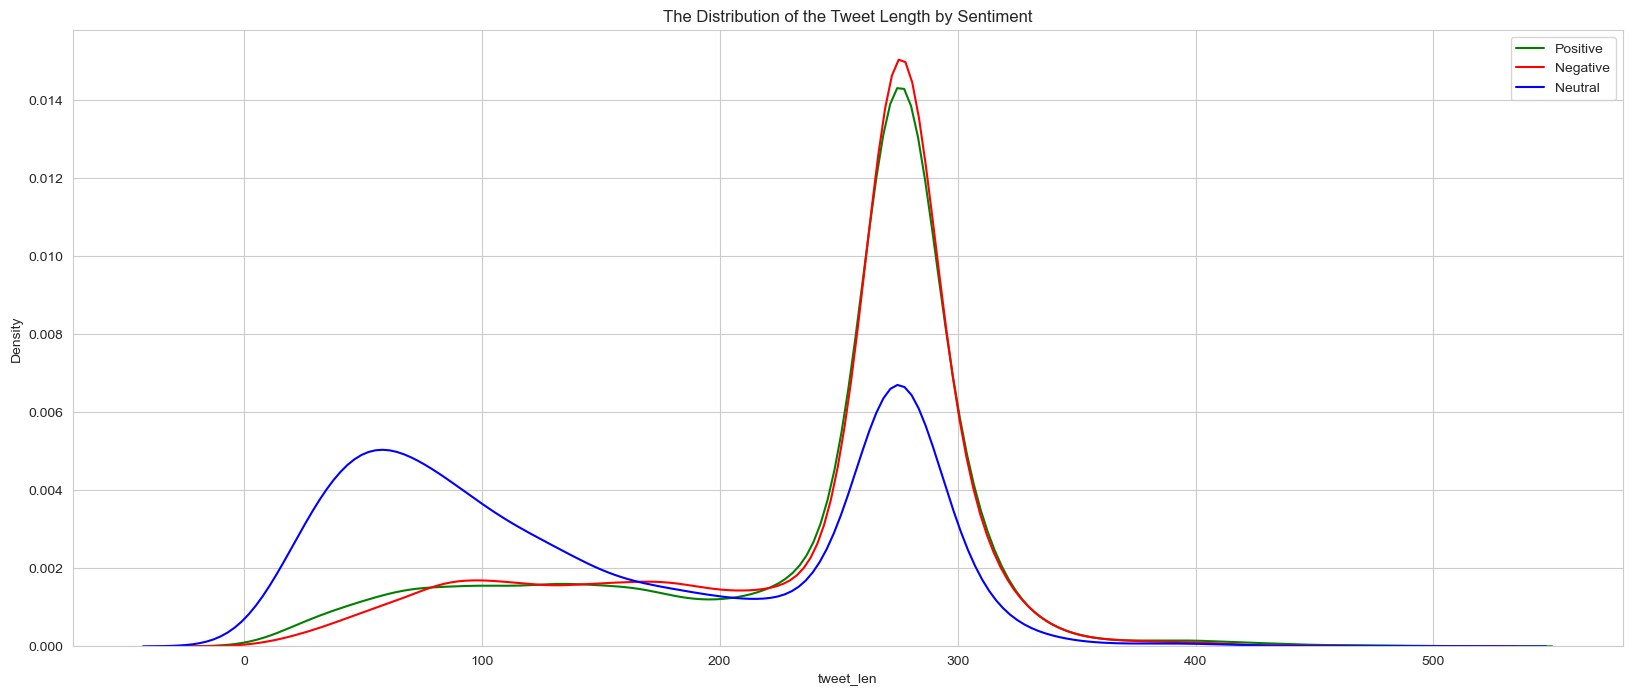

In [10]:
# Character Count by Sentiment
plt.figure(figsize=(20, 8))
sns.kdeplot(df[df['sentiment'] == 'Positive']['tweet_len'], color='green', label='Positive', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Negative']['tweet_len'], color='red', label='Negative', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Neutral']['tweet_len'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Tweet Length by Sentiment')
plt.legend()

plt.show()

- **The graph shows that most tweets are between 200 and 250 characters long, regardless of their sentiment. This is probably because Twitter has a limit of 280 characters per tweet.**

- **The graph also shows that positive and negative tweets have a higher density than neutral tweets around the peak of 200-250 characters. This means that there are more positive and negative tweets of that length than nuetral tweets. This could suggest that the user (Dr. Miguna Miguna) tends to express more positive or negative emotions in longer tweets, or that negative and positive emotions require more words to convey.**

## <b>3.5 <span style='color:#F1A424'>|</span> Word Count by Sentiment</b>

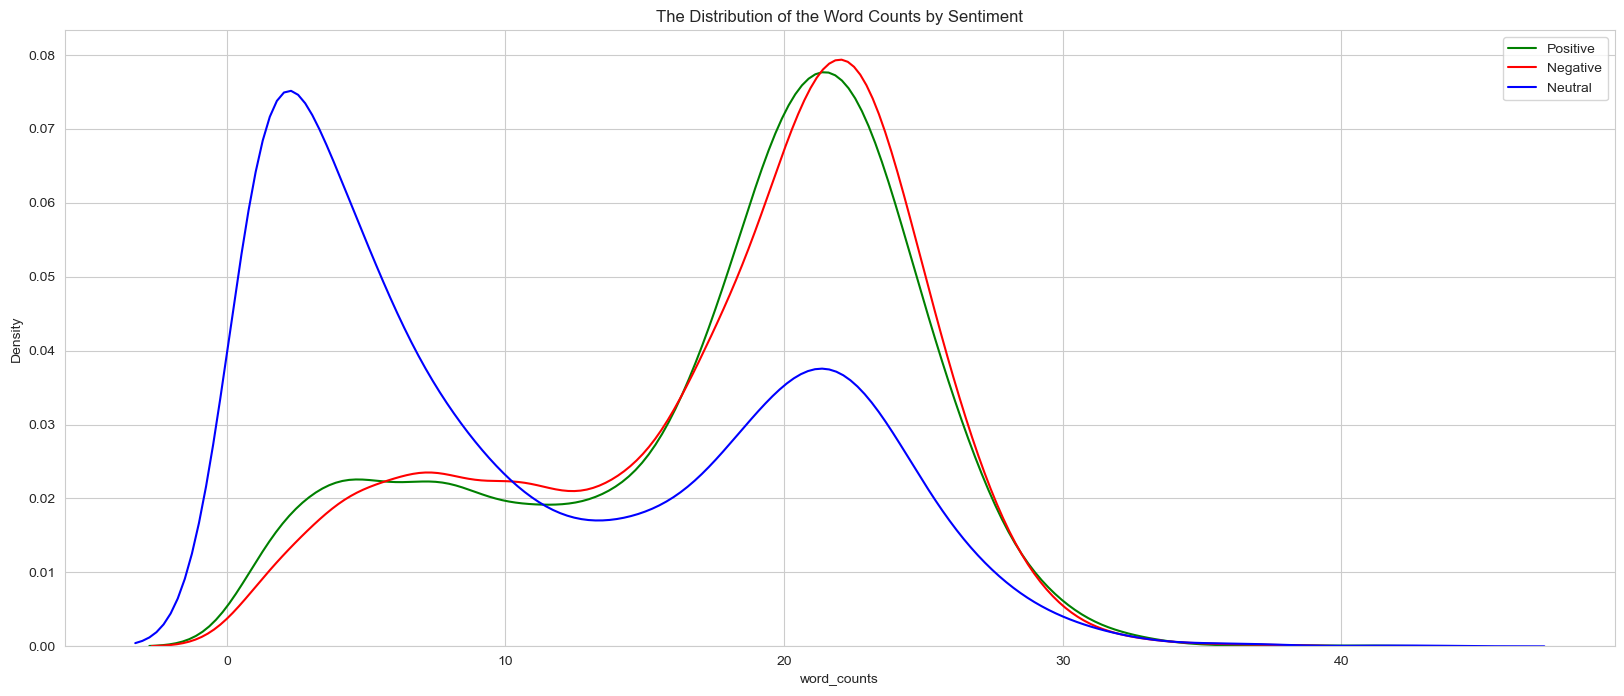

In [11]:
# word_count by sentiment type
plt.figure(figsize=(20, 8))
sns.kdeplot(df[df['sentiment'] == 'Positive']['word_counts'], color='green', label='Positive', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Negative']['word_counts'], color='red', label='Negative', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Neutral']['word_counts'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Word Counts by Sentiment')
plt.legend()

plt.show()

- **Positive and negative sentiment have similar word counts: The red and green lines, which represent positive and negative sentiment respectively, have similar shapes and peaks, indicating that the word counts for these two sentiments are not very different. This suggests that the length of the text does not affect the polarity of the sentiment much.**

- **Neutral sentiment has lower word counts: The blue line, which represents neutral sentiment, has a different shape and peak from the red and geen lines, indicating that the word counts for this sentiment are lower on average. This suggests that the texts with neutral sentiment tend to be sorter and more less descriptive than the texts with positive or negative sentiment.**

- **Most tweets have 20-30 words: The graph shows that the density of word counts is highest between 20 and 30 words, meaning that most of the texts have this range of word counts. This suggests that the texts are relatively short and concise, and do not contain too much information or details.**

## <b>3.6 <span style='color:#F1A424'>|</span> Average Word Length by Tweet</b>

In [12]:
df.columns

Index(['id', 'date', 'username', 'tweet', 'clean_tweet', 'userhandle',
       'hashtags', 'urls', 'preprocessed_tweet', 'lemma_preprocessed_tweet',
       'stemma_preprocessed_tweet', 'Subjectivity', 'Polarity', 'sentiment',
       'tweet_temp', 'tweet_len', 'word_counts'],
      dtype='object')

,clean_tweet,avg_wordlength
20486,despotic sycophants believe wrongly revolutionaries interested seeking power seek freedom justice freeing oppression exploitation restructured system revolutionaries contented free citizens,6.263158
2727,socialite bimbo integrity truth,6.571429
18444,peoples conman singing change 1997 time occupied senior cabinet position transform lives kenyans enrich certified coward knelt moi kibaki uhuru,4.411765
11239,obey law,4.625000
9794,4 feb 2 2020 despot uhuru kenyatta telephones orders state house 15 minutes failing forcefully abducted taken shimo la tewa state house told handover nairobi county prison criminal signs,4.791667


count    21692.000000
mean         5.930598
std          1.465994
min          2.500000
25%          5.122449
50%          5.581395
75%          6.210526
max         23.000000
Name: avg_wordlength, dtype: float64

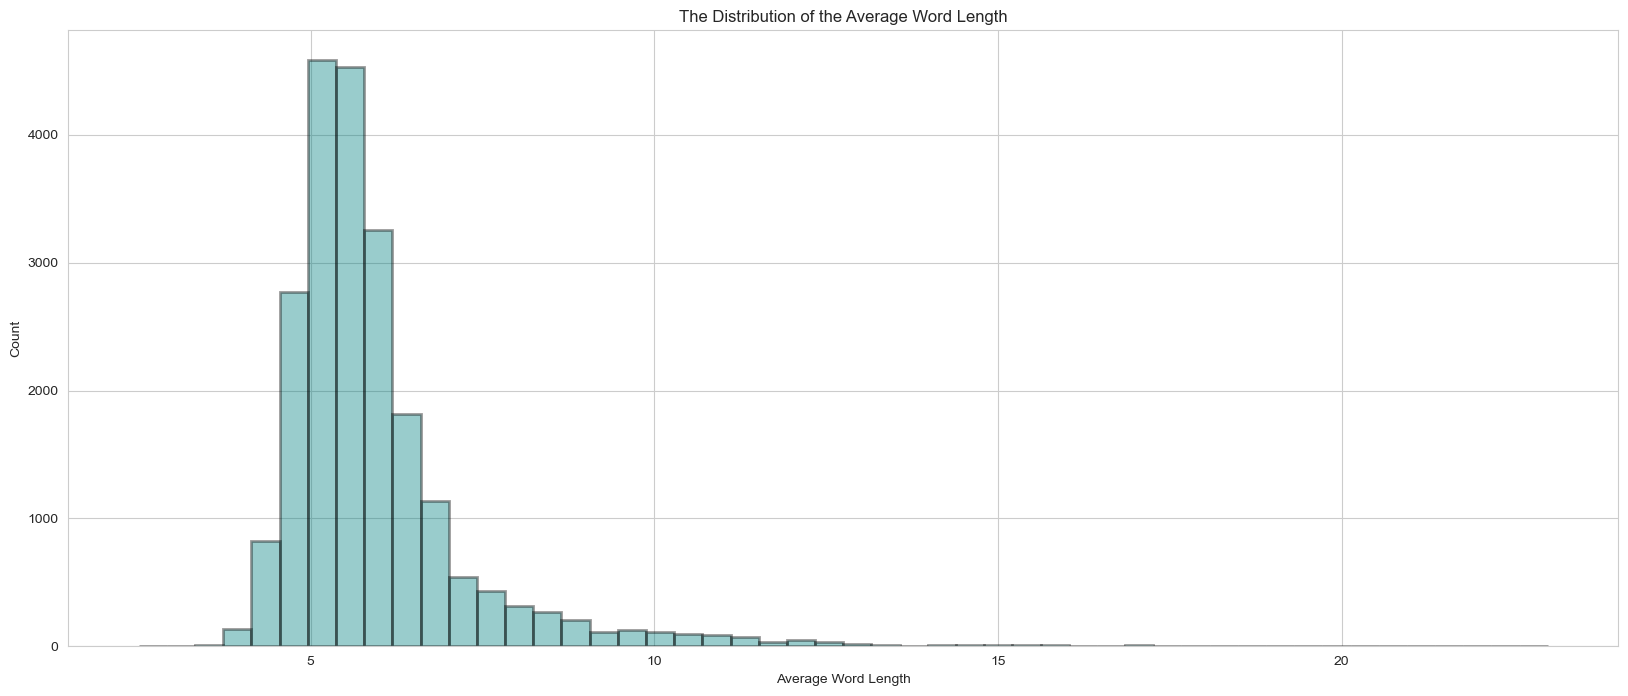

In [20]:
# get avaerage word length
def _get_avg_wordlength(x):
	count = _get_charcounts(x)/_get_wordcounts(x)
	return count

df['avg_wordlength'] = df['tweet'].apply(lambda x:_get_avg_wordlength(x))

display(df[['clean_tweet','avg_wordlength']].sample(5))

display(df['avg_wordlength'].describe())

# plot avg_wordlength
plt.figure(figsize=(20,8))
sns.distplot(df['avg_wordlength'], color='teal', kde=False, hist_kws=dict(edgecolor="black", linewidth=2), bins=50)
plt.title('The Distribution of the Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Count')


plt.show()

**The data distribution in the histogram shows that the majority of the average word lengths are between 5 and 8, with a peak around 7. This means that most of the tweets have words that are 5 to 10 letters long, and the most common average word length is 7. There is a sharp drop off in the frequency of average word lengths after 10, which means that tweets with longer words are rare.**

## <b>3.7 <span style='color:#F1A424'>|</span> Average Word Length by Sentiment</b>

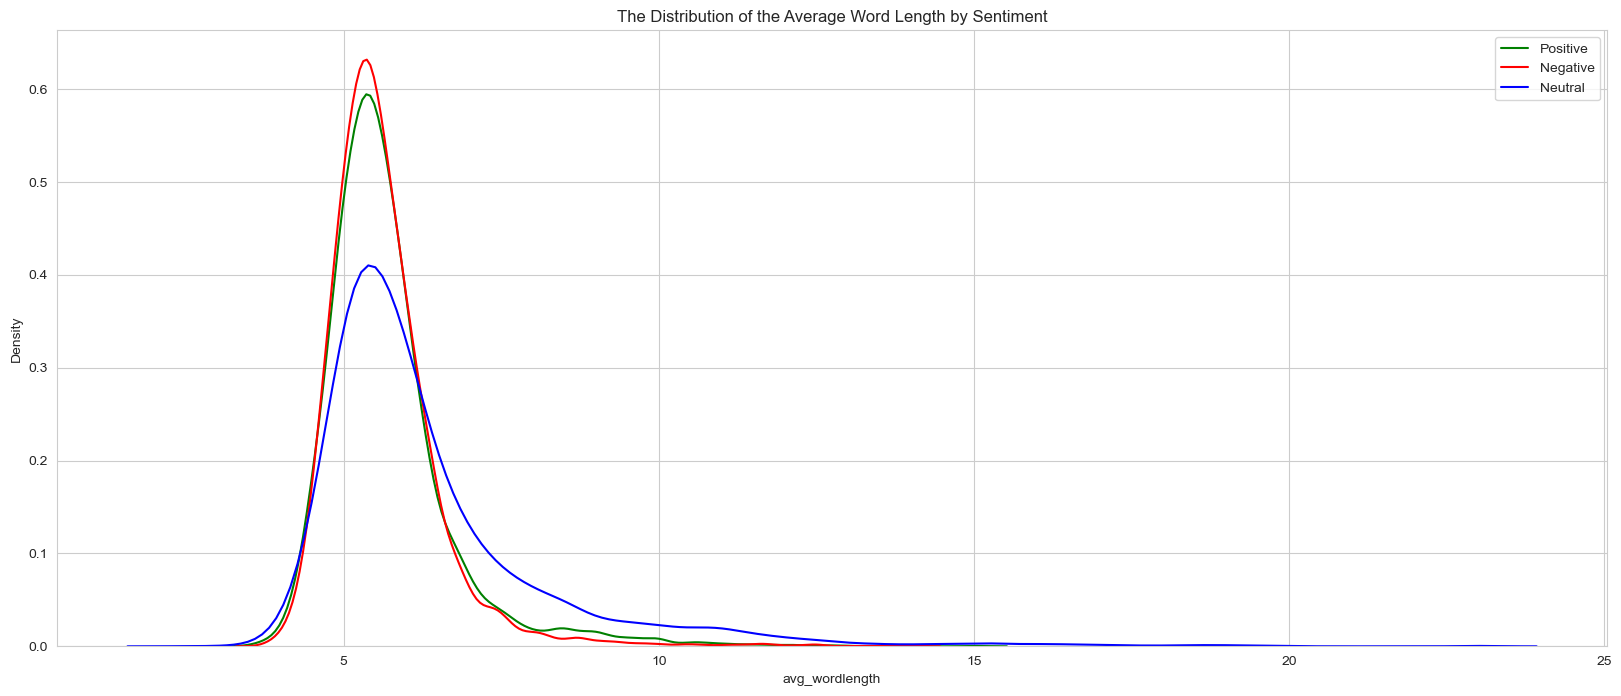

In [21]:
# plot the average word length by sentiment type
plt.figure(figsize=(20, 8))
sns.kdeplot(df[df['sentiment'] == 'Positive']['avg_wordlength'], color='green', label='Positive', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Negative']['avg_wordlength'], color='red', label='Negative', shade=False)
sns.kdeplot(df[df['sentiment'] == 'Neutral']['avg_wordlength'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Average Word Length by Sentiment')
plt.legend()

plt.show()


- **The sentiment lines tend to peak around 4-8 word length. This suggests that the majority of the tweets tend to have shorter words.**

- **The positive and Negative tweets almost have the same distribution. This suggests that the average word length does not affect the polarity of the sentiment much.**

## <b>3.8 <span style='color:#F1A424'>|</span> Sentiment Analysis</b>

### <b>3.8.0 <span style='color:#F1A424'>|</span> Distribution of Sentiments</b>

In [25]:
df['sentiment'].value_counts()

sentiment
Neutral     8888
Positive    6472
Negative    6332
Name: count, dtype: int64

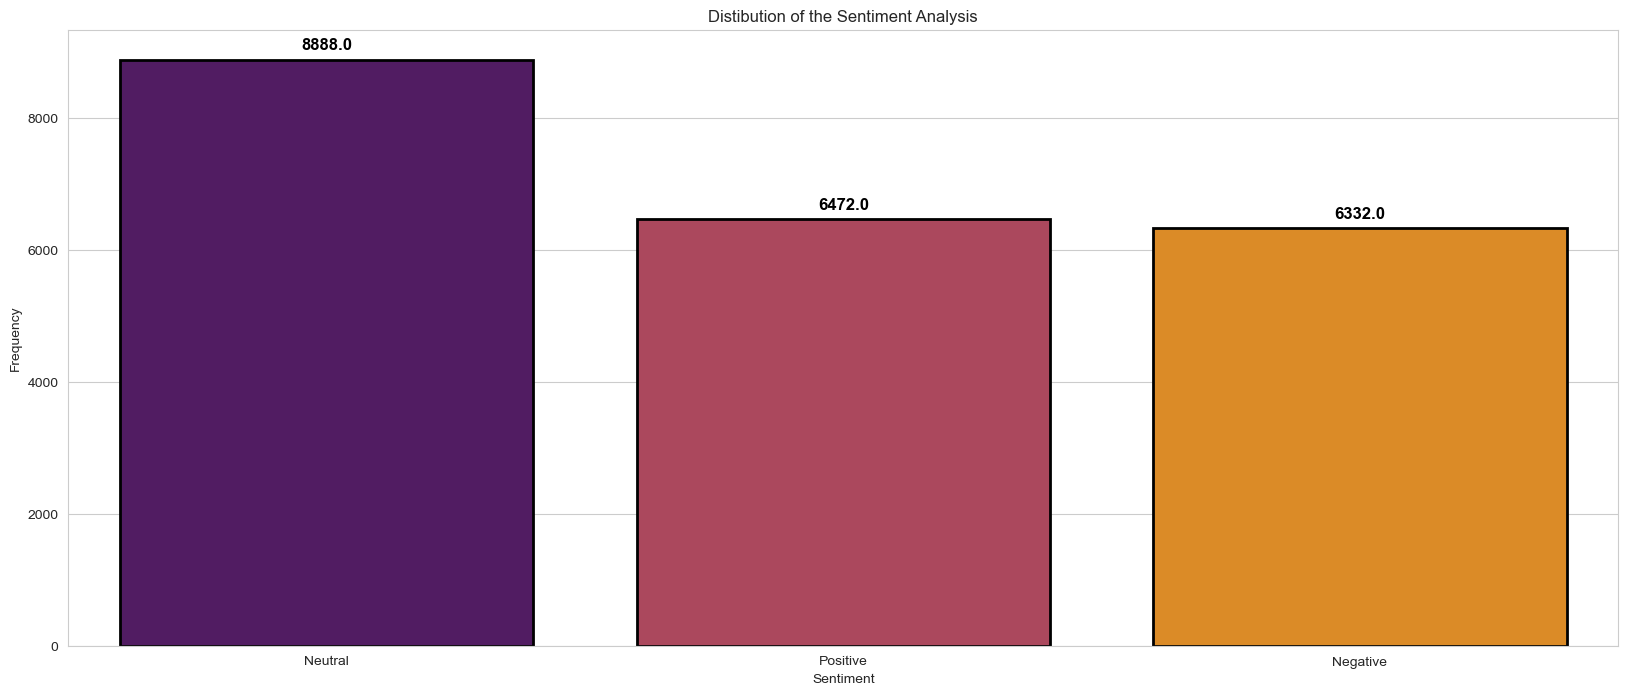

In [22]:
plt.figure(figsize=(20,8))     #width and height
sns.countplot(x='sentiment',data=df, palette = 'inferno', linewidth=2, edgecolor='black')
plt.title("Distibution of the Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Add annotations to plot
for p in plt.gca().patches:
    plt.gca().annotate(p.get_height(), 
                       (p.get_x()+p.get_width()/2., 
                        p.get_height()), ha='center', 
                        va='center', xytext=(0, 10), 
                        textcoords='offset points', 
                        fontsize=12, color='black',
                          weight='bold')


plt.show()

In [23]:
# Funnel-Chart of Sentiment Distribution
# Create a list of the sentiment types
sentiment_list = ['Positive', 'Negative', 'Neutral']

# Create a list of the count of each sentiment type
sentiment_count = [df['sentiment'].value_counts()[i] for i in range(len(sentiment_list))]
sentiment_count

# Create a funnel chart
fig = go.Figure(go.Funnel(
    y = sentiment_list,
    x = sentiment_count,
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.7
))

# Add custom color scheme
fig.update_traces(marker={"color": ["teal", "yellow", "red"]})

# Update layout
fig.update_layout(
    title={
        'text': "Sentiment Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Arial",
        size=18,
        color="#4f5b66"),
    plot_bgcolor="#f9f9f9",
    paper_bgcolor="#f9f9f9",
    width=1300, 
    height=500
)

# Add images  
fig.add_layout_image(
    dict(
        source="https://imgs.xkcd.com/comics/python_environment.png",
        xref="paper", yref="paper",
        x=1, y=0.5,
        sizex=0.2, sizey=0.2,
        opacity=0.7
    )
)

# Show figure
fig.show()

**The graph shows that the most frequent sentiment among the data is neutral, followed by positive and negative. This suggests that the data is balanced and diverse in terms of opinions and emotions.**

### <b>3.8.1 <span style='color:#F1A424'>|</span> Positive Sentiment Analysis</b>

In [32]:
# Most common positive words
df_pos = df[df['sentiment'] == 'Positive']
top = Counter([item for sublist in df_pos['tweet_temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,uhuru,1452
1,kenyatta,1398
2,kenyans,1324
3,despot,1119
4,kenya,1053
5,like,801
6,conman,771
7,justice,571
8,public,566
9,people,495


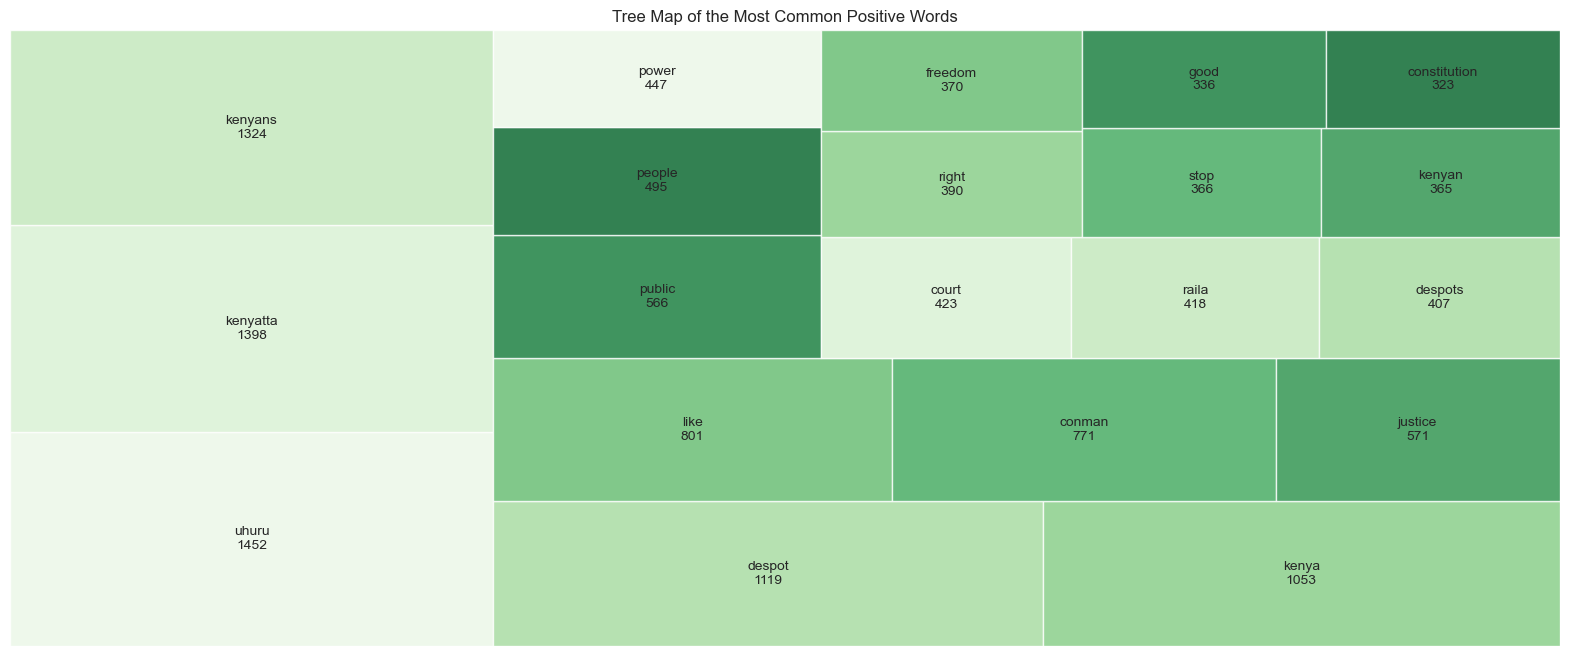

In [33]:
plt.figure(figsize=(20,8))

# Create labels with word counts
labels = [f"{word}\n{count}" for word, count in zip(temp_positive['Common_words'], temp_positive['count'])]

squarify.plot(sizes=temp_positive['count'], label=labels, alpha=0.8, color=sns.color_palette("Greens", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Positive Words')
plt.axis('off')

plt.show()

In [36]:
# Getting the most positive tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
positive_tweets = []  # list to store positive tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Positive'):
    positive_tweets.append(sortedDF['tweet'][i])
    j = j+1

# Convert list to DataFrame
positive_tweets_df = pd.DataFrame(positive_tweets, columns=['Positive Tweets'])

positive_tweets_df

,Positive Tweets
0,"@ObamaMalik @OduorOginga2 @Fredric00301622 @RailaOdinga That's the best you can come out with, Malik? Don't try me, chief. Focus on your half-brother and Trump."
1,"@SaintKarani Am I an army? How do I ""force"" my way in? I already obtained court orders. I was at the JKIA on March 26, 2018. Where were you then? Why didn't you mobilize patriots to remove the despots from power or to force them to allow me entry? I've done my best. What have you done?"
2,***THE GREATEST LIBERATORS LIBERATE THE MIND.
3,"That would replicate Jaramogi's fatal mistake and fortify impunity. The best interests of Kenyans will be served when ALL of them - Despot Uhuru Kenyatta, Deputy Despot @WilliamsRuto, Conman @RailaOdinga and Kanu Orphans - are jailed for 550 years at the Kamiti Maximum Prison."
4,"One, two three.... Integrity is priceless. #RejectBBI #DespotsMustFall https://t.co/OMXSH9M0KM"
...,...
6467,This is what @UKenyatta planned with his #HudumaNamba! He wants to monitor the movement of all Kenyans in preparation for complete military and police control. We say a firm NO!
6468,I said it is a PATHOLOGICAL MENTAL CONDITION and stated the solution. But you - like many others - don't read and clearly refuse to DIGEST.
6469,"@d3vwise @DCI_Kenya @FerdinandOgumah Then keep me alive. Start doing that by refraining from posting such messages publicly on Twitter. Use your common sense. You have access to my DM, email and phone. Exercise DISCIPLINE. And please don't reply. Thanks."
6470,"@NationBreaking Let me ask Naushad Merali - a notorious Moi era thief - why he paid the fake Uhuru Shs. 7,000,000? Fake or genuine, why did he pay? To curry favour? It's people like Merali who should be jailed for 50 years for looting Kenya and turning innocent young men now charged into con-men"


#### <b>3.8.1.2 <span style='color:#F1A424'>|</span> Most Unique Postive Words</b>

In [39]:
raw_text = [word for word_list in df['tweet_temp'] for word in word_list]

def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in df[df.sentiment != sentiment]['tweet_temp']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()

    for item in df[df.sentiment == sentiment]['tweet_temp']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words


In [40]:
Unique_Positive= words_unique('Positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,beautiful,32
1,easy,27
2,intelligent,20
3,wonderful,16
4,loved,13
5,successfully,12
6,creative,10
7,steadfast,10
8,authentic,9
9,jurists,9


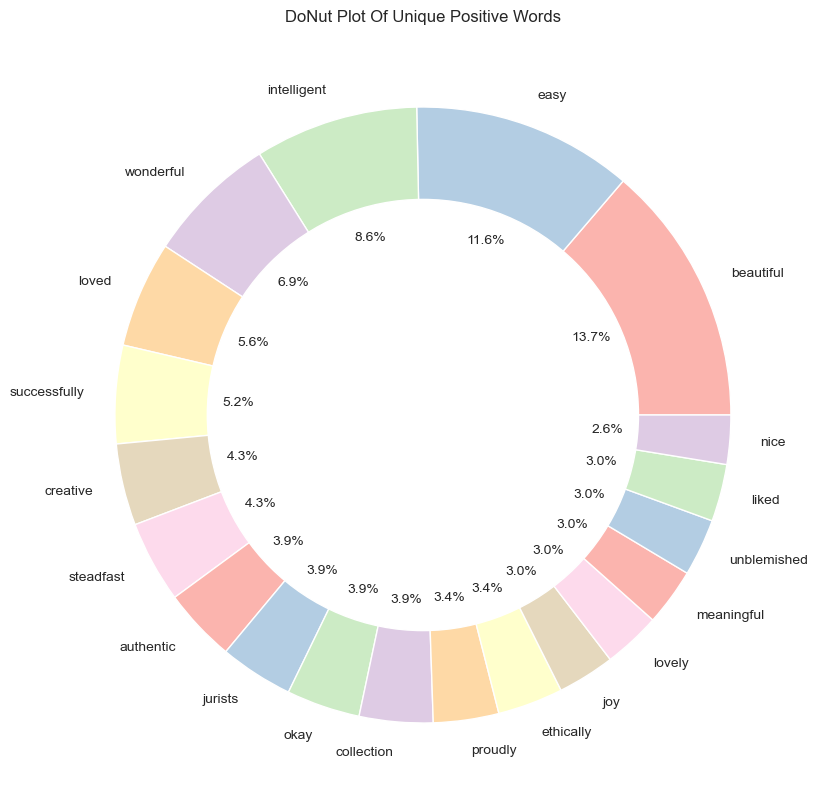

In [62]:
from palettable.colorbrewer.qualitative import Pastel1_8
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_8.hex_colors, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

### <b>3.8.2 <span style='color:#F1A424'>|</span> Negative Sentiment Analysis</b>

In [42]:
# Most Common Negative Words
df_neg = df[df['sentiment'] == 'Negative']
top = Counter([item for sublist in df_neg['tweet_temp'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(10))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,uhuru,1878
1,kenyatta,1848
2,despot,1461
3,kenyans,1298
4,kenya,993
5,conman,942
6,like,919
7,public,525
8,raila,510
9,power,466


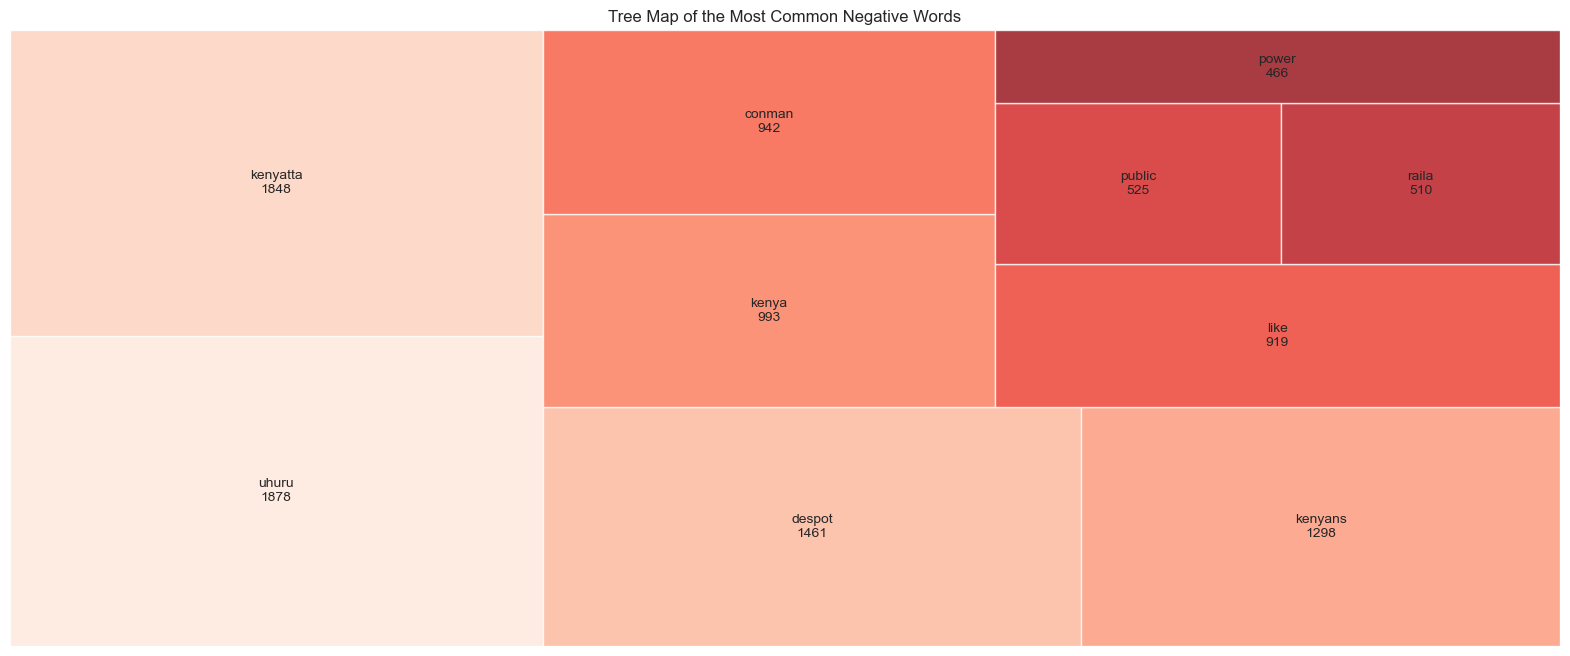

In [43]:
# plot a tree map
plt.figure(figsize=(20,8))

# Create labels with word counts
labels = [f"{word}\n{count}" for word, count in zip(temp_negative['Common_words'], temp_negative['count'])]

squarify.plot(sizes=temp_negative['count'], label=labels, alpha=0.8, color=sns.color_palette("Reds", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Negative Words')
plt.axis('off')

plt.show()

#### <b>3.8.2.1 <span style='color:#F1A424'>|</span> Most Negative Tweets</b>

In [44]:
# Getting the most negative tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
negative_tweets = []  # list to store negative tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Negative'):
    negative_tweets.append(sortedDF['clean_tweet'][i])
    j = j+1

# Convert list to DataFrame
negative_tweets_df = pd.DataFrame(negative_tweets, columns=['Negative Tweets'])

negative_tweets_df

,Negative Tweets
0,mr wants debate man open mouth utter coherent sentence man relies 100 fake media propaganda nis schemes jimi pity conman project fellow billionaires
1,kenyan media guilty campaigning nairobi ferdinand waititu kiambu leading editors ended despot uhuru kenyattas sonkos cabinets rewards effective propaganda progressive candidates like
2,socrates athenian father democracy conducted public intellectual brawls decades tyrants forced drink hemlock public policy debates conducted way beginning time write books read libraries
3,false elections credible genuinely independent yes things different stop repeating despotic lie
4,false boyfriend stop defending racists white supremacist killers twitter definitely tl free engage sadomasochist defilement tl
...,...
6327,elders stop insulting readers intelligence githeri media
6328,miserable homeless kenyans freedom speech
6329,sycophants bleat shout want remain unshaken focused committed struggle justice liberty equality kenyans struggle continue end justice shall triumph injustice evil tyranny
6330,word describes level incompetence cohen vanished 2 months ago midst vicious divorce dispute phone wallet vehicle home taken hours find body kenya cadaverdogs


#### <b>3.8.2.2 <span style='color:#F1A424'>|</span> Most Unique Negative Words</b>

In [45]:
# most unique negative words
Unique_Negative= words_unique('Negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


,words,count
0,pathetic,38
1,horrible,36
2,dangerous,24
3,broken,23
4,insane,21
5,suffers,18
6,disgusting,18
7,cruel,18
8,mad,14
9,contrived,12


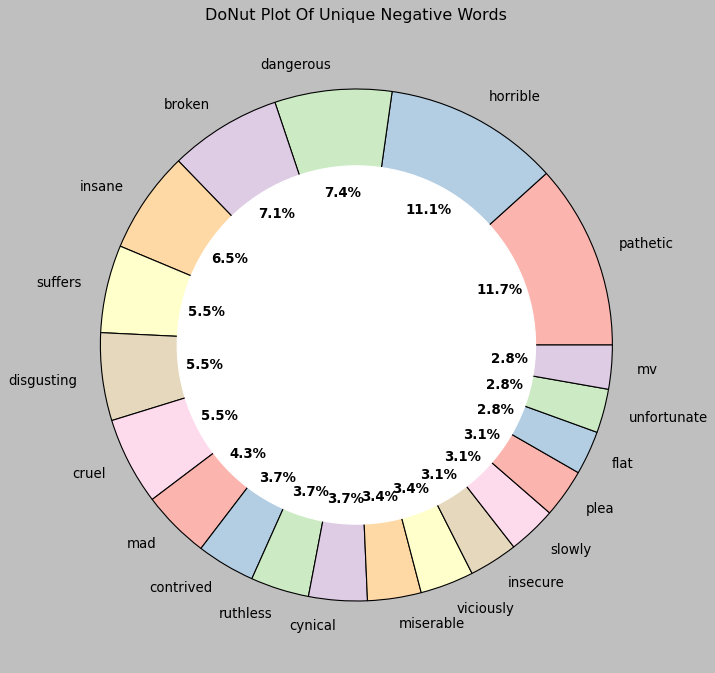

In [70]:
# DoNut Plot Of Unique Negative Words
from palettable.colorbrewer.qualitative import Pastel1_8

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')

# Calculate percentages
total = sum(Unique_Negative['count'])
percentages = [100*(i/total) for i in Unique_Negative['count']]

wedges, texts, autotexts = plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_8.hex_colors, autopct='%1.1f%%')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')

# Update autotexts' properties
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')
    autotext.set_weight('bold')

plt.show()

### <b>3.8.3 <span style='color:#F1A424'>|</span> Neutral Sentiment Analysis</b>

In [49]:
# Most Common Neutral Words
df_neu = df[df['sentiment'] == 'Neutral']
top = Counter([item for sublist in df_neu['tweet_temp'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(10))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')


,Common_words,count
0,kenyatta,1686
1,uhuru,1627
2,despot,1258
3,kenyans,1093
4,kenya,1010
5,conman,883
6,zombie,717
7,like,715
8,public,509
9,raila,462


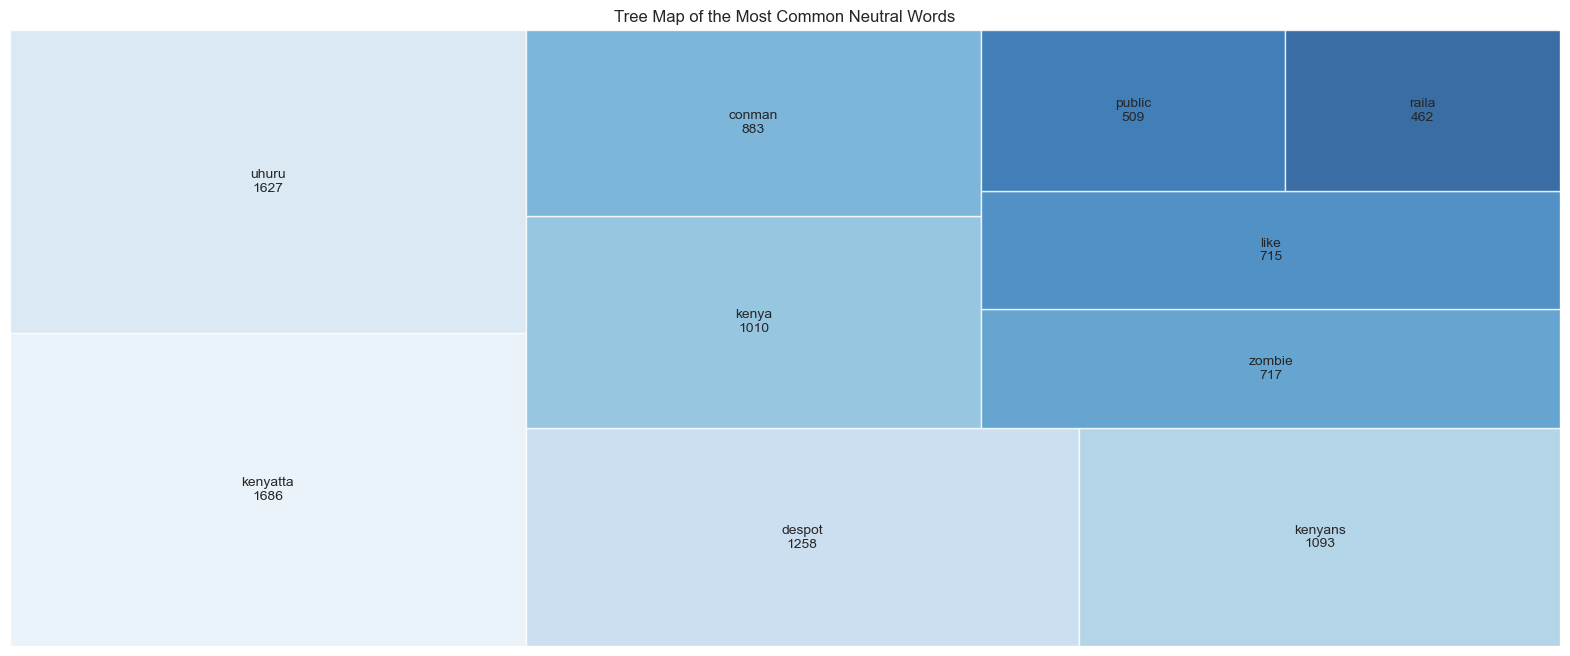

In [50]:
# plot a tree map 
plt.figure(figsize=(20,8))

# Create labels with word counts
labels = [f"{word}\n{count}" for word, count in zip(temp_neutral['Common_words'], temp_neutral['count'])]

squarify.plot(sizes=temp_neutral['count'], label=labels, alpha=0.8, color=sns.color_palette("Blues", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Neutral Words')
plt.axis('off')

plt.show()

#### <b>3.8.3.1 <span style='color:#F1A424'>|</span> Most Neutral Tweets</b>

In [51]:
# Getting the most neutral tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
neutral_tweets = []  # list to store neutral tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Neutral'):
    neutral_tweets.append(sortedDF['clean_tweet'][i])
    j = j+1

# Convert list to DataFrame
neutral_tweets_df = pd.DataFrame(neutral_tweets, columns=['Neutral Tweets'])

neutral_tweets_df

,Neutral Tweets
0,literal difference kanu ndp ldp odm cord nasa jubilee think critically
1,inept crooked announced steve mbogo accomplices kenya revenue authority charged fraud forgery theft instead posting pictures range rover purportedly recovered shame
2,20000 followers 2017 zombie
3,need kenyans defeat despots need million kenyans 56 million word confronting problems brought 1 population reserved cowards struggle cowards
4,telling zombies truth viva
...,...
8883,speak speak head hands 2 legs
8884,overrate
8885,repeat nonsense tl blocking conman person luos zombie
8886,training deep state deep state ignoring irrational


#### <b>3.8.3.2 <span style='color:#F1A424'>|</span> Most Unique Neutral Words</b>

In [52]:
# most unique neutral words
Unique_Neutral= words_unique('Neutral', 20, raw_text)
print("The top 20 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Blues')

The top 20 unique words in Neutral Tweets are:


,words,count
0,nan,327
1,raos,7
2,pardon,6
3,multitudes,6
4,suleiman,6
5,dori,6
6,ramadan,5
7,deadline,5
8,kithni,5
9,collaborator,5


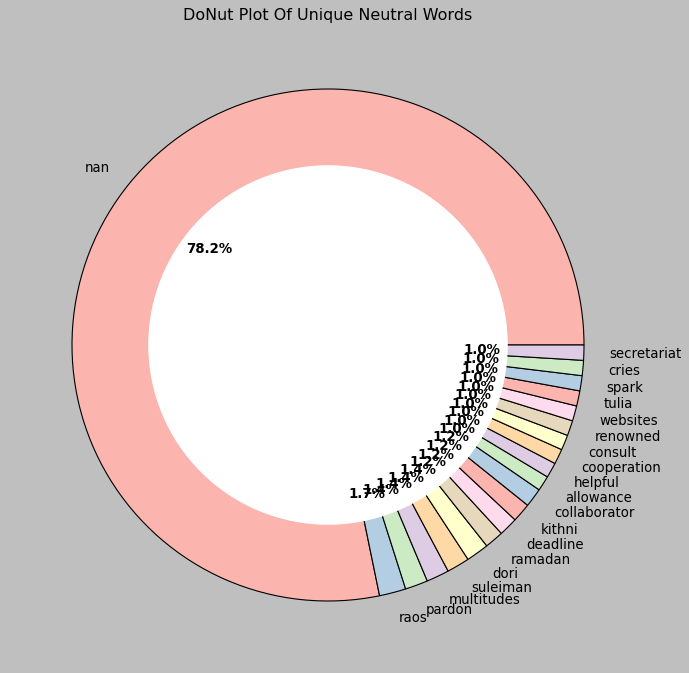

In [71]:
# DoNut Plot Of Unique Neutral Words
from palettable.colorbrewer.qualitative import Pastel1_8

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')

# Calculate percentages
total = sum(Unique_Neutral['count'])
percentages = [100*(i/total) for i in Unique_Neutral['count']]
wedges, texts, autotexts = plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_8.hex_colors, autopct='%1.1f%%')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')

# Update autotexts' properties
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')
    autotext.set_weight('bold')

plt.show()

**By Looking at the Unique Words of each sentiment,we now have much more clarity about the data,these unique words are very strong determiners of Sentiment of tweets**

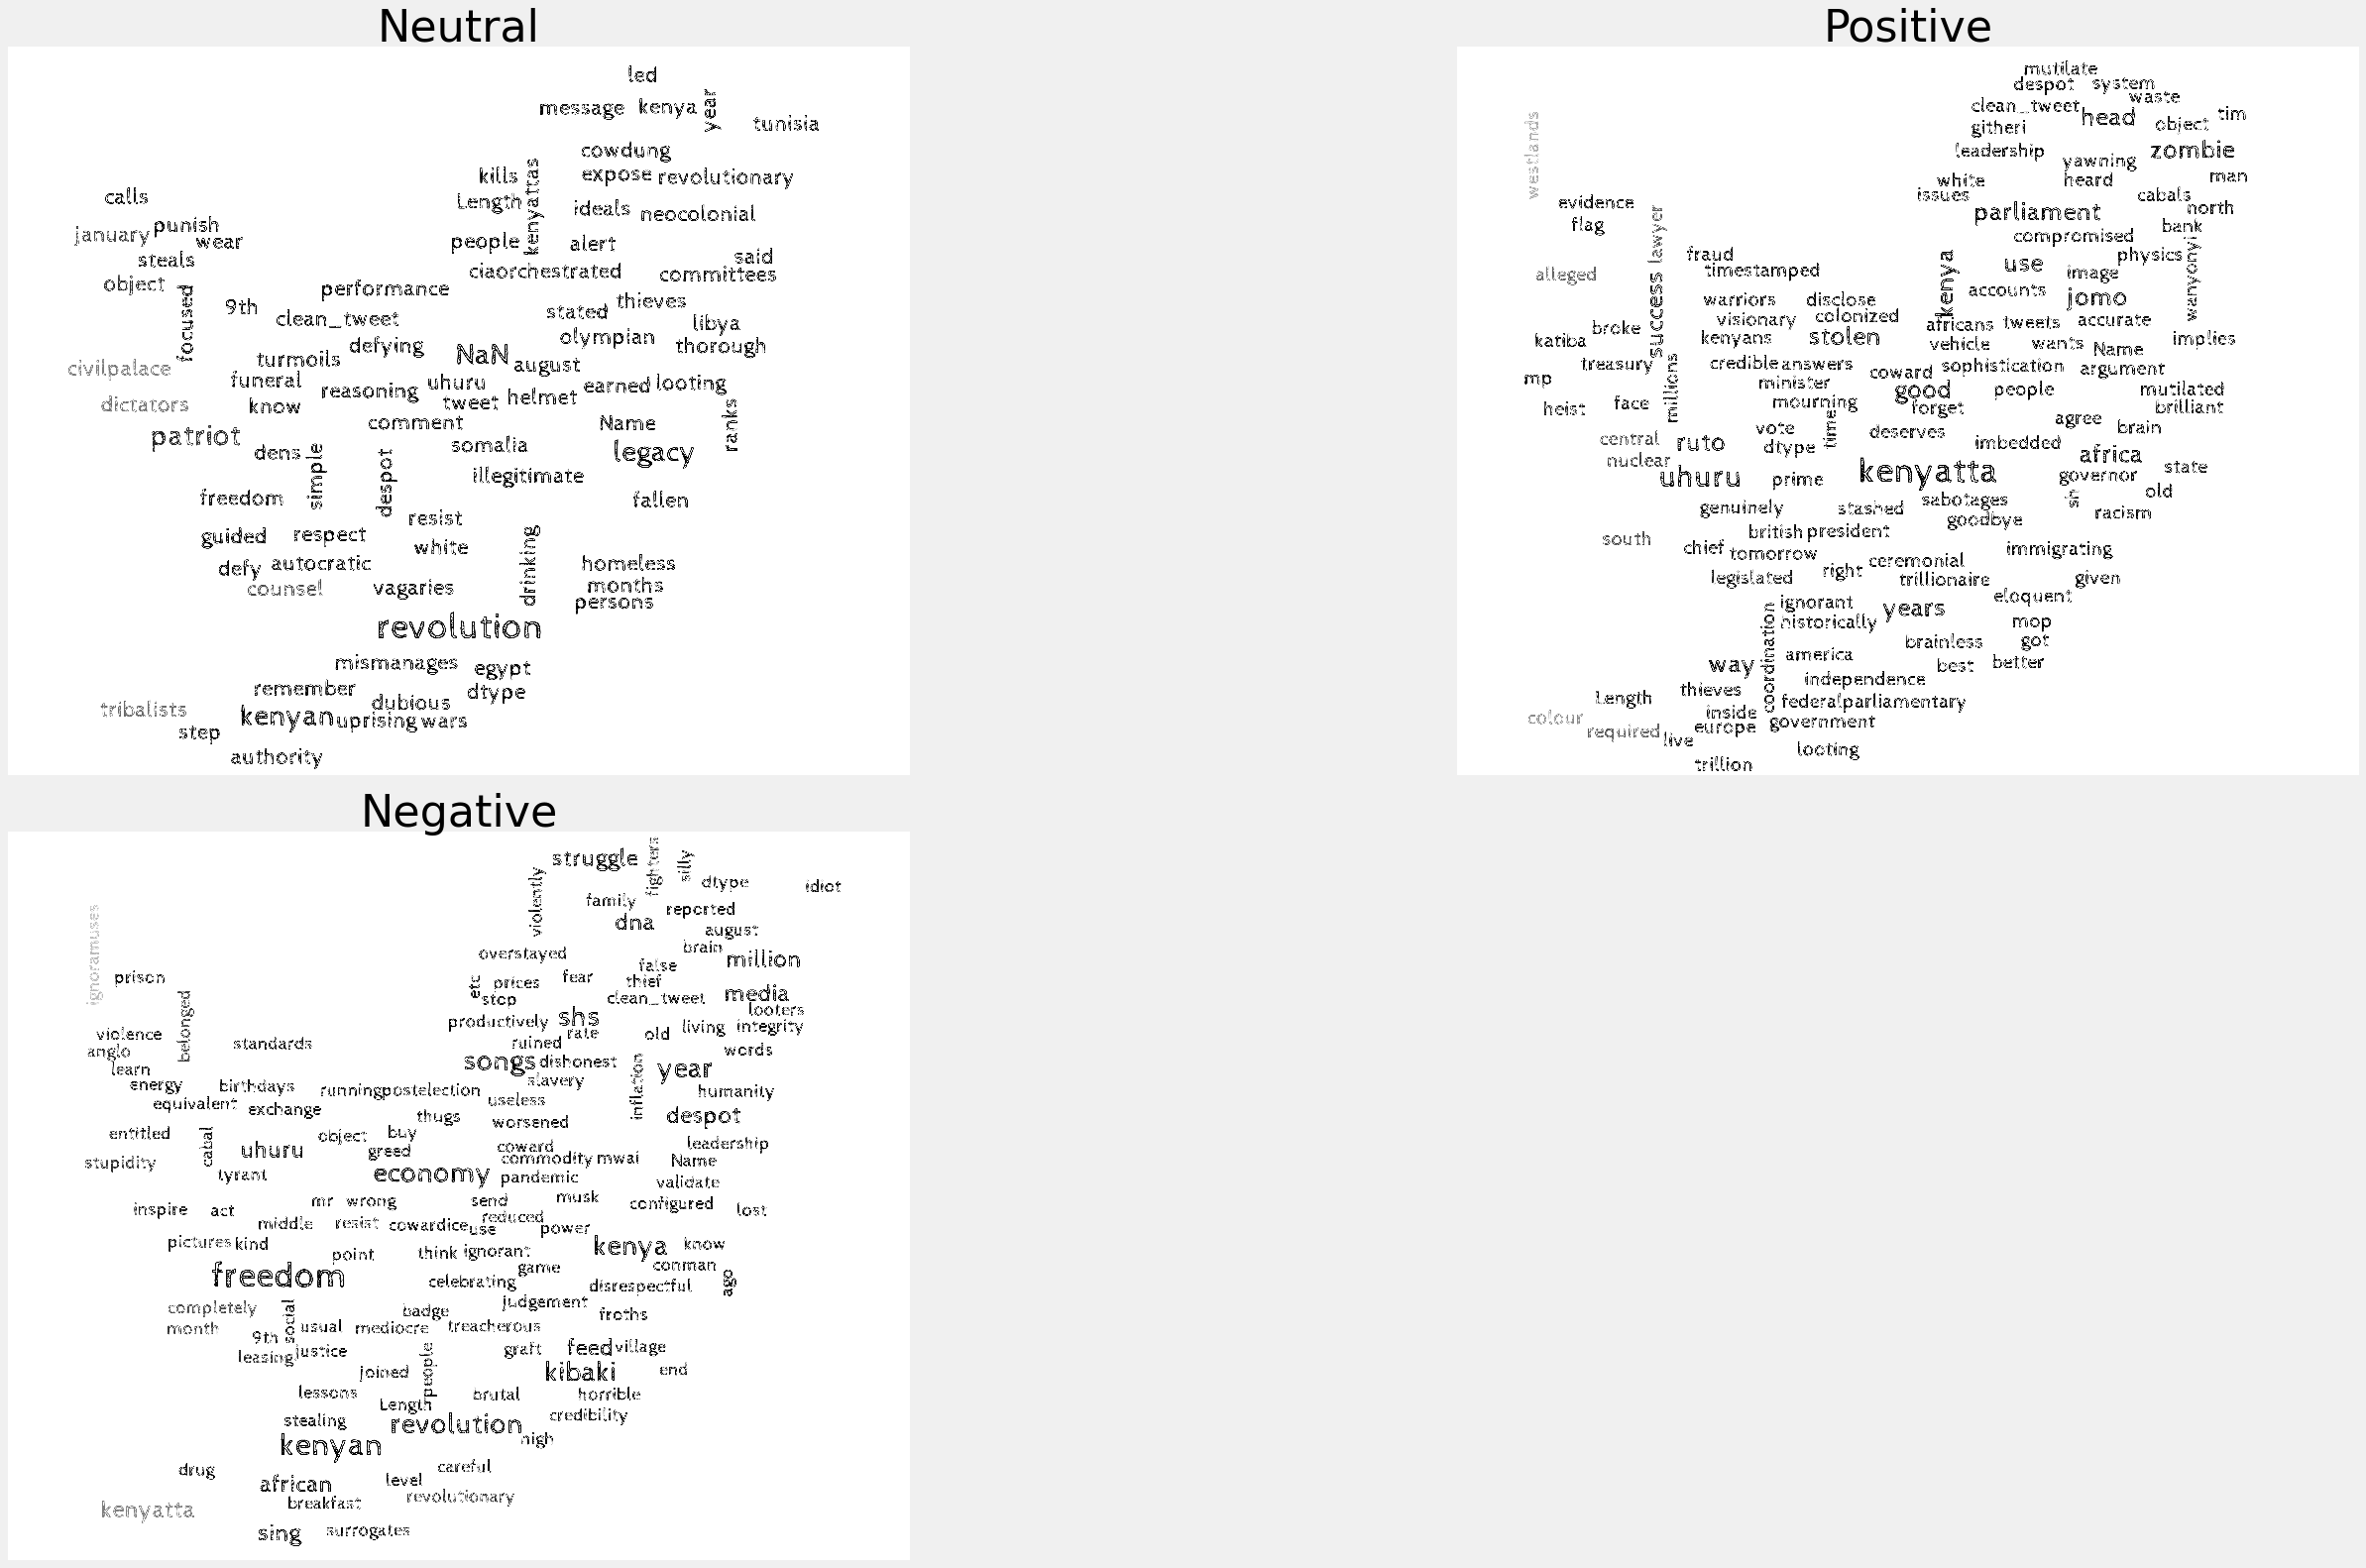

In [103]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
plt.style.use('fivethirtyeight')

# Generate a word cloud image
mask = np.array(Image.open(r"D:\Natural Language Processing\Phase 4 Project\images\twitter.png"))  # replace with your image file path
stopwords = set(STOPWORDS)

plt.figure(figsize = (40, 20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2, 2, index + 1)

    data = df[df['sentiment'] == sent]['clean_tweet']
    wordcloud_twitter = WordCloud(background_color='white',
                                  font_path=r'D:\Natural Language Processing\Phase 4 Project\fonts\Cabin_Sketch\CabinSketch-Regular.ttf',
                                  stopwords=stopwords,
                                  max_words=300,
                                  max_font_size=40,
                                  scale=5,
                                  mask=mask).generate(str(data))

    # Create coloring from the image
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wordcloud_twitter.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis('off')
    plt.title(sent, fontsize=40)

# Store visualization to file
plt.savefig("twitter_logo.png", format="png")
plt.tight_layout()

plt.show()